## Homework 2

Probabilistic Machine Learning -- Spring 2024, UniTS

## Problem 1

Given the Bayesian Linear Regression model implemented in the Notebook 6, considering the same dataset and variables (Apparent Temperature vs Humidity), optimize alpha and beta by maximizing the Marginal Likelihood.

Note: You can show here only the piece of code that you used and write the optimal alpha and beta that you obtained (so you can run it in directly on Notebook 6)

Hint: import scipy.optimize as optimize

## Problem 2

You are given a small dataset of football matches, where each row include the identifiers of the two teams and the goals scored by each of the two teams as shown in the following example:

| Team1 | Team2 | Goals1 | Goals2 |
|-------|-------|--------|--------|
| A     | B     | 2      | 1      |
| C     | A     | 0      | 3      |
| ...   | ...   | ...    | ...    |

Meaning A vs B ended 2-1, C vs A ended 0-3 etc...

The following is a probabilistic model of the result of a game between team $i$ and team $j$:

\begin{align*}
G_i & \sim Poisson(\lambda = e^{a_i - d_j}) \ \text{  (goals scored by team $i$)} \\
G_j & \sim Poisson(\lambda = e^{a_j - d_i}) \ \text{  (goals scored by team $j$)}\\
\end{align*}

Where $a_i$ and $d_i$ are unknown quantities representing respectively the attacking skill and defending skill of team $i$.

Let's define $\bold{\theta} := (a_1, d_1, a_2, d_2, \ldots, a_n, d_n)$ the set of all latent skills (parameters) of the $n$ teams and $D$ the available data.

1. Approximate the posterior $p(\bold{\theta} | D)$ using the Laplace approximation. As a prior for $\bold{\theta}$, use a multivariate gaussian distribution with mean $\bold{0}$. It is reasonable to assume that the attacking skill and defending skill of each team are correlated (e.g., you expect a team that is good at attacking to be also good at defending), if you wish you can include this information in the prior.

2. The next match will be between team A and team C, esimate by simulation (using the approximated bayesian posterior) the following quantities:
    - The probability that A will win
    - The probability that C will win
    - The probability of a draw
    - The difference of goals $G_A - G_C$ (plot an histogram)

Hints
- In order to do predictions by simulation, you have to sample from $p(G_A, G_C | D)$ multiple times. Since $p(G_A, G_C | D) = p(G_A, G_C | \theta) p(\theta | D)$, a single result can be simulated by first sampling a set of parameters $\theta$ from the posterior $p(\theta | D)$, then sampling a result $(G_A, G_C)$ from $p(G_A, G_C | \theta)$ using the $\theta$ sampled before from the posterior. Repeating this multiple times you obtain several samples that you can use as a simulation of the result.
- You can reuse the code for Laplace approximation used in Notebook 6.


In [2]:
import pandas as pd

CSV_PATH = 'https://raw.githubusercontent.com/DavideScassola/PML2024/main/datasets/matches.csv'
results = pd.read_csv(CSV_PATH)
results

,team1,team2,goals1,goals2
0,A,D,0,2
1,A,B,0,6
2,C,D,1,1
3,E,D,1,1
4,E,A,2,1
5,D,E,0,3
6,B,E,2,0
7,E,B,1,3
8,D,A,3,1
9,C,B,2,5


## Problem 3

Write the model of the previous problem in pyro and sample from the posterior using MCMC. Using the samples from the posterior, plot the histograms of $a_A$, $d_A$, $a_C$, $d_C$ (the skills of teams A and C).

## Problem 4

The Data Science group of Trieste, during the frequent aperitifs, is used to order a jug of spritz. Because of their professional deformation, they notice that the number of ice cubes is an aleatoric variable and they suspect that its distribution varies from bar to bar, despite the fact that all bars claim to use the same spritz recipe. They therefore assume a hierarchical pattern and they start recording the number of ice cubes at each aperitif (hopefully, you guys don't do that).

In [ ]:
import seaborn as sns
import pandas as pd
import pyro.distributions as dist
from pyro.infer import Predictive
from pyro.infer.mcmc import MCMC, HMC, NUTS
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
data = [[6, 1], [10, 2], [8, 3], [12, 4], [11, 5],[6, 1], [10, 2], [8, 3], [20, 4], [11, 5],[5, 1], [10, 2], [11, 3], [13, 4], [19, 5],[10, 1], [9, 2], [5, 3], [14, 4], [5, 5],
        [8, 1], [12, 2], [3, 3], [20, 4], [13, 5],[5, 1], [12, 2], [9, 3], [15, 4], [13, 5],[10, 1], [9, 2], [8, 3], [12, 4], [12, 5],[7, 1], [14, 2], [10, 3], [18, 4], [17, 5],
        [9, 1], [18, 2], [7, 3], [10, 4], [11, 5],[9, 1], [9, 2], [4, 3], [13, 4], [7, 5],[7, 1], [14, 2], [15, 3], [17, 4], [10, 5],[11, 1], [16, 2], [7, 3], [15, 4], [18, 5] ]

cubes = pd.DataFrame(data, columns=['cubes', 'location'])

cubes.value_counts('location')

location
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64

[Text(0.5, 1.0, 'Cubes Count(All Locations)')]

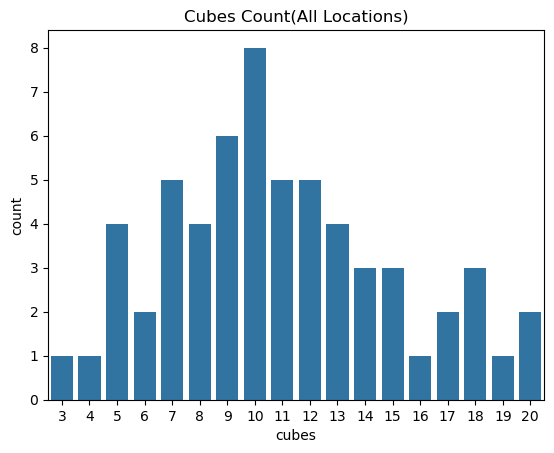

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='cubes', data=cubes, ax=ax)
ax.set(title='Cubes Count(All Locations)')

Text(0.5, 0.98, 'Ice cubes Distribution per Location')

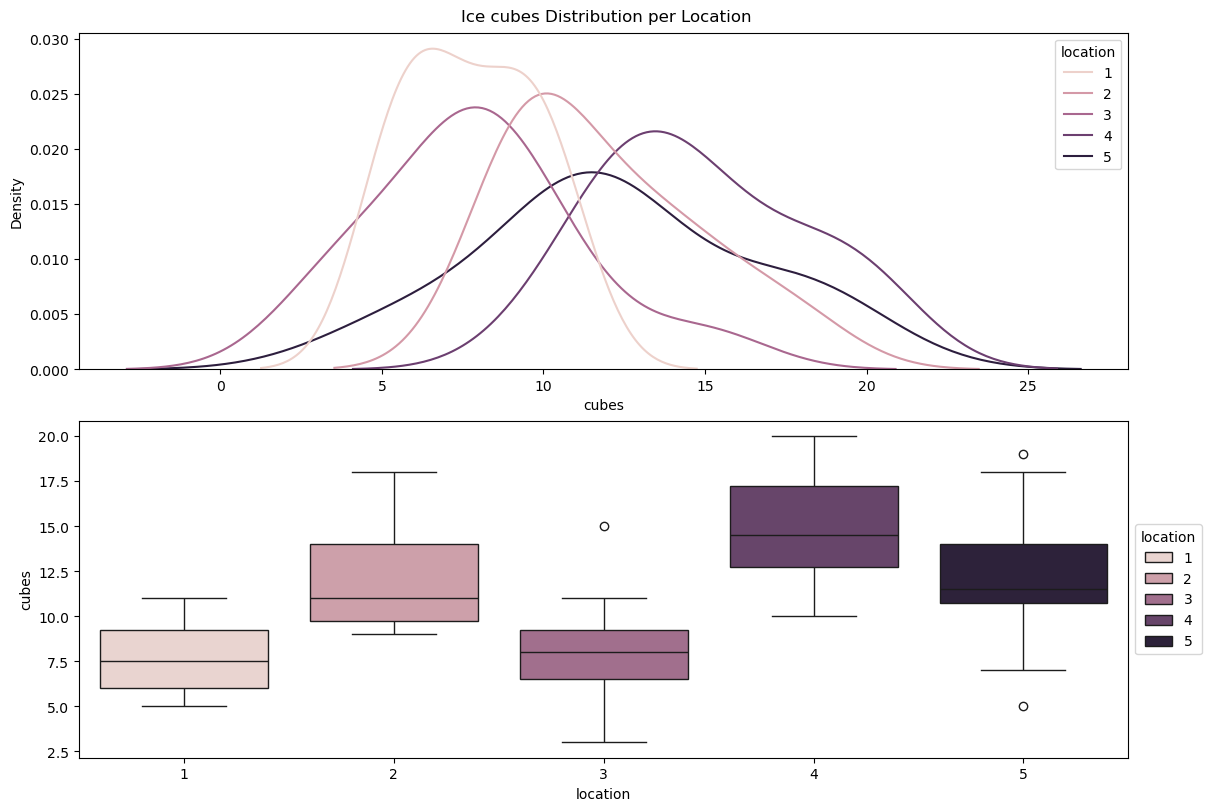

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 8), constrained_layout=True
)
sns.kdeplot(
    x='cubes',
    data=cubes,
    hue='location',
    ax=ax[0]
)
sns.boxplot(
    x='location',
    y='cubes',
    data=cubes,
    hue='location',
    dodge=False,
    ax=ax[1]
)
ax[1].legend(title='location', loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Ice cubes Distribution per Location')

In view of these plots, we can notice that:

- On the one hand side the distribution across the locations is similar, as they all come from a unique recipe. This is why you may want to model all locations together (pooling).

- On the other hand, as the locations are not exactly the same, you may want to model all locations separately (no pooling).

Hence, we would like to have a mix of the two settings described above (partial pooling). Hierarchical models are a great way of doing this assuming different parameters for each location, but all of them coming from a common global (hyper) prior distribution.

We decide to model the distribution of ice cubes in the following way:

$$\mu \sim Gamma(2, 0.2)$$
$$\sigma \sim Exp(1)$$

$$\lambda_j \sim Gamma(\mu, \sigma)$$
$$cubes_j \sim Poisson(\lambda_j)$$


In [ ]:
def ice_cubes(J, y=None):
    # TODO: Write the model in pyro (J is the number of locations)
    return

For simplicity, consider only the average number of cubes as dataset.

In [ ]:
y = [0, 0, 0, 0, 0]
for i in range(5):
    y[i] = np.average(cubes[cubes['location'] == (i+1)]['cubes'].values)
y = torch.tensor(y)

# TODO: Perform MCMC inference and show the summary

In [ ]:
# TODO: Extract the posterior samples for lamda and plot the histograms for each value of lamda
posterior_lambda = None

# Plot the posterior for each value of lamda
for i in range(posterior_lambda.shape[1]):
    plt.hist(posterior_lambda[:, i], bins=30, density=True, alpha=0.5, label=f'location_{i+1}')

plt.xlabel('lam')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# TODO: Generate the posterior predictive samples for each location and plot the histograms